# Imports EXPERT

Esta tabla contiene la información de los imports a nivel de fichero (módulo). --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'import__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('imports')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-14 13:20:36.085034 Data cache files found ...
2024-06-14 13:20:36.089179 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'imports'
TABLE_FEATURES = ['import__number_imports', 'import__module_imports_pct', 'import__average_imported_modules', 'import__from_imports_pct', 'import__average_from_imported_modules', 'import__average_as_in_imported_modules', 'import__local_imports_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (11102, 7)
As we can see the downloaded data contains a total of 11102 instances. For each instance we have 7 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11102 entries, 7124 to 18225
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   import__number_imports                  11102 non-null  int64  
 1   import__module_imports_pct              11102 non-null  float64
 2   import__average_imported_modules        11102 non-null  float64
 3   import__from_imports_pct                11102 non-null  float64
 4   import__average_from_imported_modules   11102 non-null  float64
 5   import__average_as_in_imported_modules  11102 non-null  float64
 6   import__local_imports_pct               11102 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 693.9 KB
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas y una de tipo objeto. 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

import__number_imports                    0
import__module_imports_pct                0
import__average_imported_modules          0
import__from_imports_pct                  0
import__average_from_imported_modules     0
import__average_as_in_imported_modules    0
import__local_imports_pct                 0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct




### 2.2 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,11102.0,6.211403,6.738149,0.0,2.000000,5.000000,9.000000,194.0
import__module_imports_pct,11102.0,0.288833,0.309024,0.0,0.000000,0.200000,0.500000,1.0
import__average_imported_modules,11102.0,0.629493,0.499343,0.0,0.000000,1.000000,1.000000,8.5
import__from_imports_pct,11102.0,0.649467,0.343146,0.0,0.428571,0.727273,1.000000,1.0
import__average_from_imported_modules,11102.0,1.337413,0.961079,0.0,1.000000,1.069048,1.666667,23.0
import__average_as_in_imported_modules,11102.0,0.018821,0.094881,0.0,0.000000,0.000000,0.000000,1.0
import__local_imports_pct,11102.0,0.680033,0.461931,0.0,0.000000,1.000000,1.000000,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "import__number_imports": [(0, 0), (0, 3), (3, 7), (7, inf)],  # min: 0 max: 194 
    "import__module_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 8.5 
    "import__from_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_from_imported_modules": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)],  # min: 0.0 max: 23.0 
    "import__average_as_in_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0 
    "import__local_imports_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['import__number_imports'], 10))
print(get_statistics(X_copy, ['import__module_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_imported_modules'], 10))
print(get_statistics(X_copy, ['import__from_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_from_imported_modules'], 10))
print(get_statistics(X_copy, ['import__average_as_in_imported_modules'], 10))
print(get_statistics(X_copy, ['import__local_imports_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
import__number_imports  count  percentage
               [7_inf]   3985   35.894433
                 [3_7)   3576   32.210413
                 [0_3)   2856   25.725095
                 [0_0]    685    6.170059

import__module_imports_pct  count  percentage
                 [0.0_0.0]   4152   37.398667
                 [0.0_0.5)   3867   34.831562
                   [0.5_1)   2324   20.933165
                     [1_1]    759    6.836606

import__average_imported_modules  count  percentage
                       [0.0_inf]   6950   62.601333
                       [0.0_0.0]   4152   37.398667

import__from_imports_pct  count  percentage
                 [0.5_1)   4737   42.667988
                   [1_1]   3467   31.228607
               [0.0_0.5)   1454   13.096739
               [0.0_0.0]   1444   13.006665

import__average_from_imported_modules  count  percentage
                            [1.0_inf]   5555   50.036030
                            [1.0_1.0]   410

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (11102, 7)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

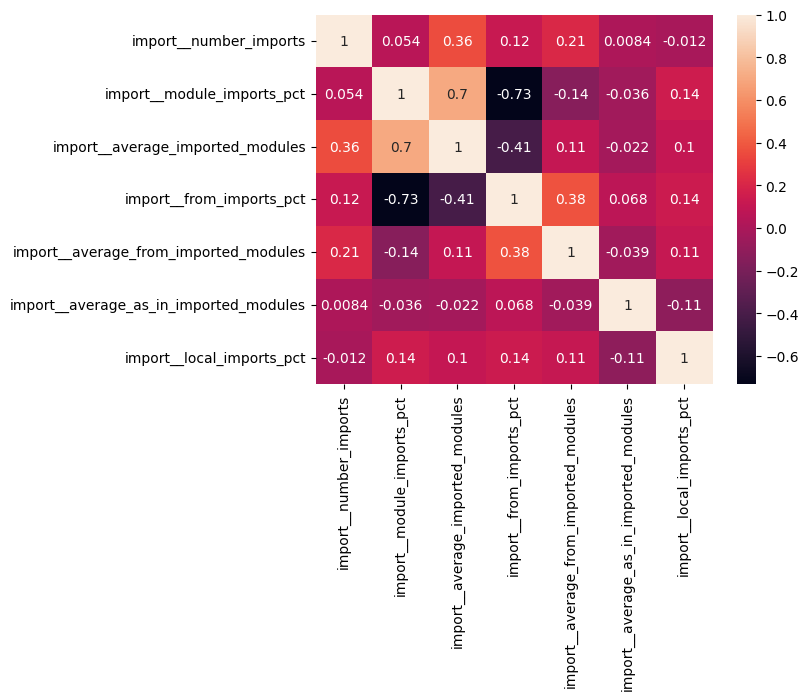

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 7 variable (3 porcentuales y 4 numericas y una categorica)

### Variable number_imports (1/7)
Esta variable es de tipo numérica y nos indica el número imports definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 194. Con una media de 6.2.

<Axes: ylabel='import__number_imports'>

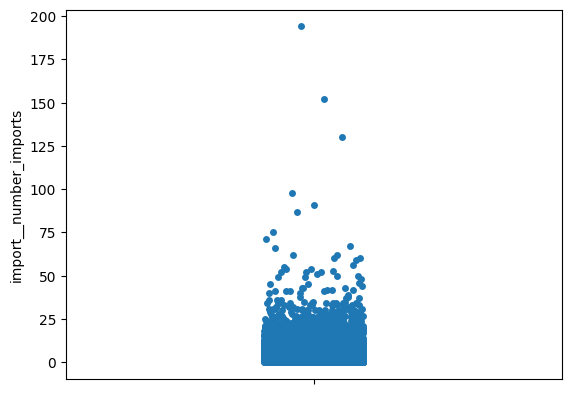

In [11]:
sns.stripplot(X['import__number_imports'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [12]:
print_outliers_for_df_column(X, 'import__number_imports')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.872178469856087
Rango valores atípicos extremos (Tukey): [-19.0,30.0]
Rango valores atípicos leves (Tukey): [-8.5,19.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.5040347361811164,352.8099853481194]
-3.0IQR: 0 instancias tienen un valor para import__number_imports inferior a -19.0 (Q1-3*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__number_imports inferior a -8.5 (Q1-1.5*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
+1.5IQR: 374 instancias tienen un valor para import__number_imports superior a 19.5 (Q3+1.5*IQR) para import__number_imports. Representando un 3.369% del total de instancias.
+3.0IQR: 88 instancias tienen un valor para import__number_imports superior a 30.0 (Q3-3*IQR) para import__number_imports. Representando un 0.7926% del total de instancias.
L: 2004 instancias tienen un valor para imp

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 30 (Con un MC de 87 usamos Tuckey Extremo)

In [13]:
X[X['import__number_imports'] > 30].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,47.545456,0.212317,0.897727,0.787683,1.530460,0.032592,0.507943
std,25.673416,0.179856,0.304743,0.179856,0.644906,0.064655,0.499724
min,31.000000,0.000000,0.000000,0.258065,1.000000,0.000000,0.000000
25%,33.750000,0.055890,1.000000,0.697498,1.000000,0.000000,0.000000
50%,40.000000,0.179902,1.000000,0.820098,1.150000,0.003846,0.880317
75%,52.000000,0.302502,1.000000,0.944110,2.034259,0.035244,1.000000
max,194.000000,0.741935,1.000000,1.000000,3.300000,0.384615,1.000000


### Variable average_imported_modules (2/7)
Esta variable representa el número medio de alias importados en cada clausula import. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 8.5. Con una media de 0.62.

<Axes: ylabel='import__average_imported_modules'>

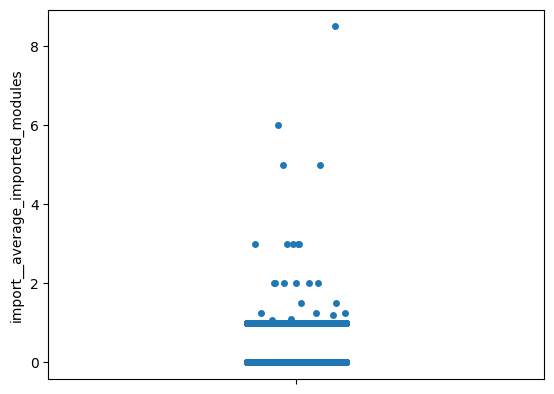

In [14]:
sns.stripplot(X['import__average_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente. 

In [15]:
print_outliers_for_df_column(X, 'import__average_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.40414746719248157
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.364564777575883,8.553831944917837]
-3.0IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -3.0 (Q1-3*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -1.5 (Q1-1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 9 instancias tienen un valor para import__average_imported_modules superior a 2.5 (Q3+1.5*IQR) para import__average_imported_modules. Representando un 0.08107% del total de instancias.
+3.0IQR: 4 instancias tienen un valor para import__average_imported_modules superior a 4.0 (Q3-3*IQR) para import__average_imported_modules. Representando un 0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.0 (Con un MC de 40 usamos Tuckey Extremo)

In [16]:
X[X['import__average_imported_modules'] > 4.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,5.750000,0.305556,6.125000,0.694444,3.065476,0.027778,0.479167
std,3.304038,0.130289,1.652019,0.130289,1.491140,0.055556,0.335927
min,2.000000,0.222222,5.000000,0.500000,1.500000,0.000000,0.000000
25%,3.500000,0.243056,5.000000,0.687500,2.196429,0.000000,0.375000
50%,6.000000,0.250000,5.500000,0.750000,2.880952,0.000000,0.583333
75%,8.250000,0.312500,6.625000,0.756944,3.750000,0.027778,0.687500
max,9.000000,0.500000,8.500000,0.777778,5.000000,0.111111,0.750000


### IMPORTANTE
Mirar estos 4 imports

### Variable average_from_imported_modules (3/7)
Esta variable representa el número medio de imports con la clausula From. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 23.0. Con una media de 1.33.

<Axes: ylabel='import__average_from_imported_modules'>

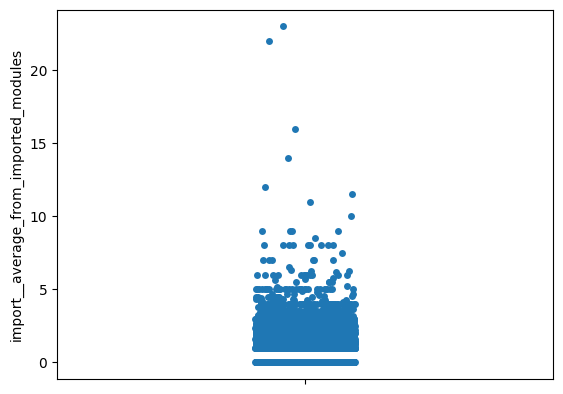

In [17]:
sns.stripplot(X['import__average_from_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [18]:
print_outliers_for_df_column(X, 'import__average_from_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7231572730779281
Rango valores atípicos extremos (Tukey): [-0.9999998807907104,3.6666665077209473]
Rango valores atípicos leves (Tukey): [5.960464477539063e-08,2.666666567325592]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9204246188000956,19.707343465656493]
-3.0IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -0.9999998807907104 (Q1-3*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 1444 instancias tienen un valor para import__average_from_imported_modules inferior a 5.960464477539063e-08 (Q1-1.5*IQR) para import__average_from_imported_modules. Representando un 13.01% del total de instancias.
+1.5IQR: 714 instancias tienen un valor para import__average_from_imported_modules superior a 2.666666567325592 (Q3+1.5*IQR) para import__average_from_imported_modules. Representando un 6.431% del total de instancias.
+3.0IQR: 226 inst

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 19.7 (Con un MC de 72 usamos U)

In [19]:
X[X['import__average_from_imported_modules'] > 19.7].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,2.0,2.0,2.0,2.0,2.000000,2.0,2.0
mean,1.0,0.0,0.0,1.0,22.500000,0.0,1.0
std,0.0,0.0,0.0,0.0,0.707107,0.0,0.0
min,1.0,0.0,0.0,1.0,22.000000,0.0,1.0
25%,1.0,0.0,0.0,1.0,22.250000,0.0,1.0
50%,1.0,0.0,0.0,1.0,22.500000,0.0,1.0
75%,1.0,0.0,0.0,1.0,22.750000,0.0,1.0
max,1.0,0.0,0.0,1.0,23.000000,0.0,1.0


### IMPORTANTE
El 13% de los imports tienen average_from_imported_modules = 0.0

### Variable average_as_in_imported_modules (4/7)
Esta variable es de tipo numérica y nos indica el número medio de import con la cláusula as. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.09.

<Axes: ylabel='import__average_as_in_imported_modules'>

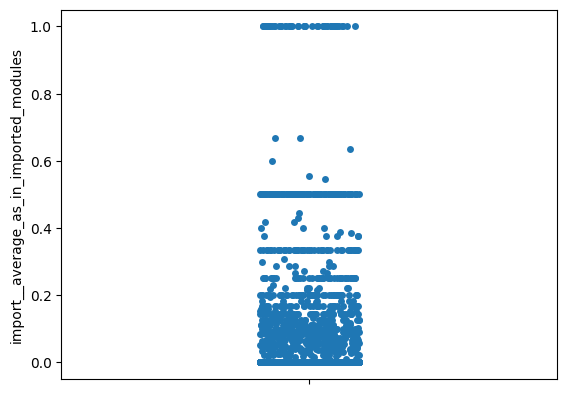

In [20]:
sns.stripplot(X['import__average_as_in_imported_modules'])

In [21]:
print_outliers_for_df_column(X, 'import__average_as_in_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.891410358546399
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-3*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-1.5*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 840 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3+1.5*IQR) para import__average_as_in_imported_modules. Representando un 7.566% del total de instancias.
+3.0IQR: 840 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3-3*IQR) para import__average_as_in_imported_modules. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Con un MC de 89 usamos U)

In [22]:
X[X['import__average_as_in_imported_modules'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,11.960714,0.220474,0.730357,0.779526,1.352332,0.248744,0.499054
std,13.982098,0.206349,0.522641,0.206349,0.579893,0.248702,0.493739
min,1.000000,0.000000,0.000000,0.071429,1.000000,0.007692,0.000000
25%,5.000000,0.000000,0.000000,0.642857,1.000000,0.083333,0.000000
50%,9.000000,0.181818,1.000000,0.818182,1.000000,0.142857,0.485294
75%,14.000000,0.357143,1.000000,1.000000,1.500000,0.333333,1.000000
max,194.000000,0.928571,8.500000,1.000000,8.000000,1.000000,1.000000


### Variable module_imports_pct (5/7)
Esta variable representa la proporción de import simples del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.28.

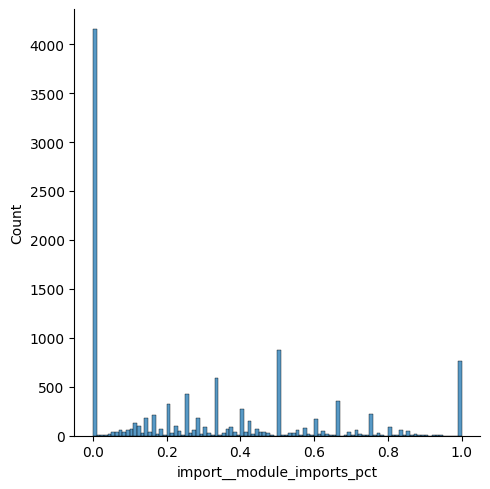

In [23]:
sns.displot(X['import__module_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [24]:
print_outliers_for_df_column(X, 'import__module_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4021436870098114
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.18356527053654473,4.246764530091391]
-3.0IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -1.5 (Q1-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.75 (Q1-1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 1.25 (Q3+1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 2.0 (Q3-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias ti

In [25]:
X[X['import__module_imports_pct'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,4152.000000,4152.0,4152.0,4152.000000,4152.000000,4152.000000,4152.000000
mean,2.988680,0.0,0.0,0.835019,1.206069,0.021659,0.617869
std,4.001399,0.0,0.0,0.371208,1.070793,0.111694,0.484543
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000
50%,2.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000
75%,4.000000,0.0,0.0,1.000000,1.500000,0.000000,1.000000
max,91.000000,0.0,0.0,1.000000,23.000000,1.000000,1.000000


### IMPORTANTE
El 37% de los imports tienen module_imports_pct = 0.0

### Variable from_imports_pct (6/7)
Esta variable representa la proporción de imports que usan la clausula From en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.64.


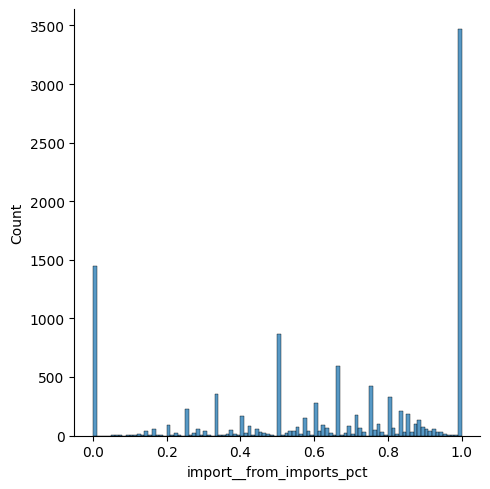

In [26]:
sns.displot(X['import__from_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [27]:
print_outliers_for_df_column(X, 'import__from_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.04535283554608252
Rango valores atípicos extremos (Tukey): [-1.2857142686843872,2.7142857015132904]
Rango valores atípicos leves (Tukey): [-0.428571417927742,1.8571428507566452]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.3027621309665731,2.027635626125271]
-3.0IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -1.2857142686843872 (Q1-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -0.428571417927742 (Q1-1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 1.8571428507566452 (Q3+1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 2.7142857015132904 (Q3-3*IQR

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [28]:
X[(X['import__from_imports_pct'] > 0.0) & (X['import__from_imports_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,8.859958,0.395351,1.004706,0.604649,1.589461,0.019224,0.706896
std,7.376376,0.204791,0.141882,0.204791,0.770165,0.087919,0.448393
min,2.000000,0.016949,1.000000,0.058824,1.000000,0.000000,0.000000
25%,5.000000,0.230769,1.000000,0.500000,1.000000,0.000000,0.000000
50%,7.000000,0.375000,1.000000,0.625000,1.363636,0.000000,1.000000
75%,11.000000,0.500000,1.000000,0.769231,1.928571,0.000000,1.000000
max,194.000000,0.941176,8.500000,0.983051,11.500000,1.000000,1.000000


### IMPORTANTE
El 13% tienen un 0% y el 31% tienen un 100%.

### Variable local_imports_pct (7/7)
Esta variable representa la proporción de imports no escritos al comienzo del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.68. 

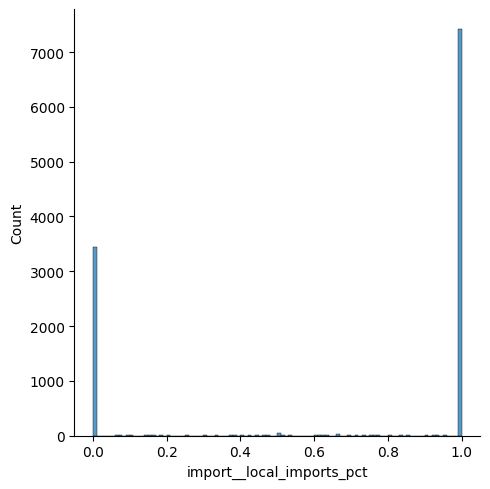

In [29]:
sns.displot(X['import__local_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [30]:
print_outliers_for_df_column(X, 'import__local_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.40534147914876145
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-7.5899956987153665,1.3630444251353626]
-3.0IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -3.0 (Q1-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 4.0 (Q3-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un va

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [31]:
X[(X['import__local_imports_pct'] < 1.0) & X['import__local_imports_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,9.053279,0.437073,0.958811,0.562927,1.600415,0.037530,0.548056
std,10.601325,0.287473,0.719907,0.287473,1.089792,0.139827,0.235799
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824
25%,4.000000,0.200000,1.000000,0.333333,1.000000,0.000000,0.384615
50%,6.000000,0.468627,1.000000,0.531373,1.354167,0.000000,0.558442
75%,11.250000,0.666667,1.000000,0.800000,2.000000,0.000000,0.750000
max,130.000000,1.000000,8.500000,1.000000,8.000000,1.000000,0.984848


### IMPORTANTE
El 31% tienen un 0% y el 66% tienen un 100%.

## Multivariate

Isolation forest algorithm

In [32]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
7621,4,0.750000,1.0,0.250000,1.000000,1.000000,0.000000,EXPERT
7674,4,0.750000,1.0,0.250000,1.000000,1.000000,0.000000,EXPERT
8341,91,0.000000,0.0,1.000000,1.000000,0.307692,0.000000,EXPERT
8840,7,0.857143,1.0,0.142857,1.000000,1.000000,1.000000,EXPERT
9130,3,0.666667,1.0,0.333333,1.000000,1.000000,0.000000,EXPERT
9491,49,0.163265,1.0,0.836735,1.000000,0.219512,0.000000,EXPERT
9652,5,0.600000,1.0,0.400000,1.000000,1.000000,0.000000,EXPERT
9675,3,0.666667,1.0,0.333333,1.000000,1.000000,0.000000,EXPERT
10027,8,0.875000,1.0,0.125000,1.000000,1.000000,1.000000,EXPERT
10071,14,0.928571,1.0,0.071429,1.000000,1.000000,0.928571,EXPERT


### IMPORTANTE
Revisar las 13 identificadas como outliers.

In [33]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,11089.0,6.196050,6.670993,0.0,2.0000,5.000000,9.000000,194.0
import__module_imports_pct,11089.0,0.288596,0.308888,0.0,0.0000,0.200000,0.500000,1.0
import__average_imported_modules,11089.0,0.629239,0.499428,0.0,0.0000,1.000000,1.000000,8.5
import__from_imports_pct,11089.0,0.649631,0.343097,0.0,0.4375,0.727273,1.000000,1.0
import__average_from_imported_modules,11089.0,1.337068,0.959498,0.0,1.0000,1.076923,1.666667,23.0
import__average_as_in_imported_modules,11089.0,0.017915,0.090532,0.0,0.0000,0.000000,0.000000,1.0
import__local_imports_pct,11089.0,0.680300,0.461833,0.0,0.0000,1.000000,1.000000,1.0


In [34]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,13.0,19.307692,26.367228,1.000000,4.000000,7.000000,21.000000,91.000000
import__module_imports_pct,13.0,0.490534,0.370210,0.000000,0.095238,0.666667,0.750000,0.928571
import__average_imported_modules,13.0,0.846154,0.375534,0.000000,1.000000,1.000000,1.000000,1.000000
import__from_imports_pct,13.0,0.509466,0.370210,0.071429,0.250000,0.333333,0.904762,1.000000
import__average_from_imported_modules,13.0,1.631073,1.926753,1.000000,1.000000,1.000000,1.000000,8.000000
import__average_as_in_imported_modules,13.0,0.791294,0.328065,0.219512,0.384615,1.000000,1.000000,1.000000
import__local_imports_pct,13.0,0.452381,0.508989,0.000000,0.000000,0.000000,1.000000,1.000000
